In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data_ml/bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
df.datetime = df.datetime.astype('datetime64')

In [5]:
df['datetime'].apply(lambda x : x.month)

0         1
1         1
2         1
3         1
4         1
         ..
10881    12
10882    12
10883    12
10884    12
10885    12
Name: datetime, Length: 10886, dtype: int64

In [6]:
df['year'] = df['datetime'].apply(lambda x : str(x.year))
df['month'] = df['datetime'].apply(lambda x : str(x.month))
df['day'] = df['datetime'].apply(lambda x : str(x.day))
df['hour'] = df['datetime'].apply(lambda x : str(x.hour))

In [7]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [8]:
df.drop(['datetime','casual','registered'], axis=1, inplace= True)

In [9]:
df.info() # 년,월,일 int형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  object 
 10  month       10886 non-null  object 
 11  day         10886 non-null  object 
 12  hour        10886 non-null  object 
dtypes: float64(3), int64(6), object(4)
memory usage: 1.1+ MB


In [10]:
df = pd.get_dummies(df)

In [11]:
df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year_2011,...,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9
0,1,0,0,1,9.84,14.395,81,0.0,16,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,40,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,9.02,13.635,80,0.0,32,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmse(y, pred):
    squarred_error = (y-pred)**2
    rmse = np.sqrt(np.mean(squarred_error))
    return rmse

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [14]:
y= df['count']
x = df.drop(columns = ['count'])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size= 0.3, random_state= 111)

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [17]:
lr = LinearRegression()
rid = Ridge()
lasso = Lasso()

lr.fit(x_train, y_train)
rid.fit(x_train, y_train)
lasso.fit(x_train, y_train)

preds_lr = lr.predict(x_test)
preds_rid = rid.predict(x_test)
preds_lasso = lasso.predict(x_test)

print('rmse_lr :', rmse(y_test, preds_lr))
print('rmse_rid :', rmse(y_test, preds_rid))
print('rmse_lasso :', rmse(y_test, preds_lasso))

rmse_lr : 100.1440373015736
rmse_rid : 100.15805988968935
rmse_lasso : 104.29002838932085


In [18]:
# scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
 lr = LinearRegression()
rid = Ridge()
lasso = Lasso()

lr.fit(x_train_scaled, y_train)
rid.fit(x_train_scaled, y_train)
lasso.fit(x_train_scaled, y_train)

preds_lr = lr.predict(x_test_scaled)
preds_rid = rid.predict(x_test_scaled)
preds_lasso = lasso.predict(x_test_scaled)

print('rmse_lr :', rmse(y_test, preds_lr))
print('rmse_rid :', rmse(y_test, preds_rid))
print('rmse_lasso :', rmse(y_test, preds_lasso))

rmse_lr : 100.14544400559083
rmse_rid : 100.15120878142162
rmse_lasso : 104.27949448343307


In [20]:
lr.score(x_test_scaled,y_test)

0.6994119180793785

In [21]:
coef_df =pd.DataFrame(lr.coef_, index= x.columns)
coef_df

,0
season,1.354954e+14
holiday,-4.968750e+00
workingday,3.656250e+00
weather,-7.384180e+01
temp,6.064453e+01
...,...
hour_5,-8.958348e+13
hour_6,-8.958348e+13
hour_7,-8.958348e+13
hour_8,-8.958348e+13


<AxesSubplot:>

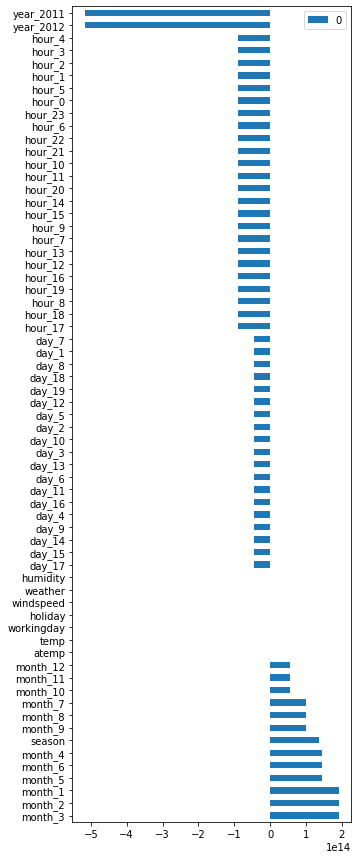

In [22]:
coef_df.sort_values(0,ascending= False).plot(kind='barh',figsize=(5,15))

In [23]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [25]:

rfc_reg = RandomForestRegressor()
gbm_reg= GradientBoostingRegressor()
xgb_reg = XGBRegressor()
lgbm_reg = LGBMRegressor()

for model in [rfc_reg, gbm_reg, xgb_reg, lgbm_reg]:
    model.fit(x_train_scaled, y_train)
    preds = model.predict(x_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print( model.__class__, rmse)

<class 'sklearn.ensemble._forest.RandomForestRegressor'> 49.61298231487765
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'> 81.2040703364815
<class 'xgboost.sklearn.XGBRegressor'> 45.86804309854254
<class 'lightgbm.sklearn.LGBMRegressor'> 45.39967886971719


In [26]:
# y 분포

<AxesSubplot:>

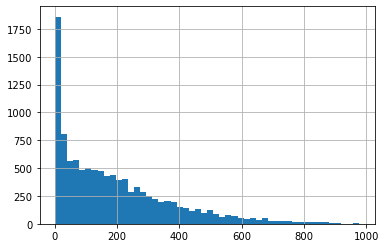

In [27]:
y.hist(bins=50) # long tail - label 값이 쏠려있음

In [39]:
y_log = np.log1p(y)
y_train_log = np.log1p(y_train) #  로그쓰는 이유:  0값으로 인한 error를 방지
y_test_log = np.log1p(y_test)

<AxesSubplot:>

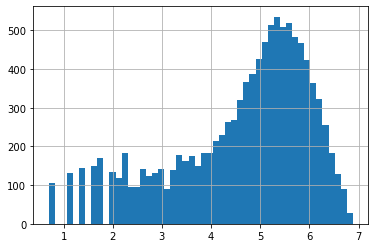

In [40]:
y_log.hist(bins=50)

In [42]:
lr = LinearRegression()
rid = Ridge()
lasso = Lasso(0.0001)

lr.fit(x_train_scaled, y_train_log)
rid.fit(x_train_scaled, y_train_log)
lasso.fit(x_train_scaled, y_train_log)

preds_lr = lr.predict(x_test_scaled)
preds_rid = rid.predict(x_test_scaled)
preds_lasso = lasso.predict(x_test_scaled)

preds_lr_exp = np.expm1(preds_lr)
preds_rid_exp = np.expm1(preds_rid)
preds_lasso_exp = np.expm1(preds_lasso)

print('rmse_lr :', np.sqrt(mean_squared_error(y_test.values, preds_lr_exp)))
print('rmse_rid :', np.sqrt(mean_squared_error(y_test.values, preds_rid_exp)))
print('rmse_lasso :',np.sqrt(mean_squared_error(y_test.values, preds_lasso_exp)))

rmse_lr : 95.59103377677496
rmse_rid : 95.71035086085791
rmse_lasso : 95.61643945818338


In [43]:
rfc_reg = RandomForestRegressor()
gbm_reg= GradientBoostingRegressor()
xgb_reg = XGBRegressor()
lgbm_reg = LGBMRegressor()

for model in [rfc_reg, gbm_reg, xgb_reg, lgbm_reg]:
    model.fit(x_train_scaled, y_train)
    preds = model.predict(x_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print( model.__class__, rmse)

<class 'sklearn.ensemble._forest.RandomForestRegressor'> 49.52854378826083
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'> 81.20412684448772
<class 'xgboost.sklearn.XGBRegressor'> 45.86804309854254
<class 'lightgbm.sklearn.LGBMRegressor'> 45.39967886971719
